## Libraries

In [1]:
import pandas as pd
import nltk, re, multiprocessing
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
import spacy
from zipfile import ZipFile
import os
from wordcloud import WordCloud
from gensim.models.phrases import Phrases, Phraser
from gensim.models.fasttext import FastText
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Load Data

In [ ]:
data = pd.read_csv('articles.csv')
data.shape
pd.set_option('display.max_colwidth', None)
data["text"].head()

## Word Cloud on uncleand data

Text(0.5, 1.0, 'Word Cloud on uncleaned text')

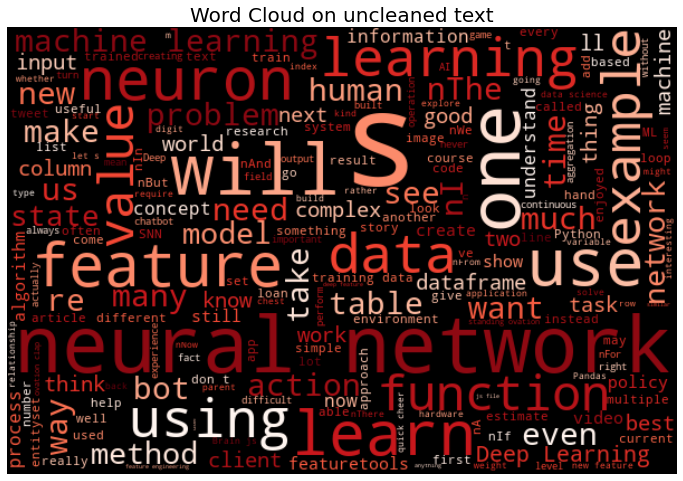

In [3]:
cloud=WordCloud(colormap="Reds",width=600,height=400).generate(str(data["text"]))
fig=plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("Word Cloud on uncleaned text", size = 20)

## Text Pre-processing

In [4]:
def cleaned_text(text_data):
    clean = text_data.lower()
    clean = re.sub("\n"," ",clean)
    clean = re.sub("http\S+"," ",clean)
    clean = re.sub("www\S+"," ",clean)
    #clean = re.sub(r"[,-.:;]"," ", clean)
    clean=re.sub("[^a-z]"," ",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
data["cleaned_data"] = data["text"].apply(cleaned_text)
def cleaned_data_2(text):
    cleaned_txt = re.sub("AI","Artificial Intelligence", text)
    return cleaned_txt
data["text"] = data["text"].apply(cleaned_data_2)

In [5]:
# Removing stowords
stop=stopwords.words('english')
stop.extend(["make","get","also","use","using","used","even","though","could","would","us","much","uses","makes","part"])
data["stopwords_rem"]=data["cleaned_data"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [6]:
# Instead of Applying lemmatization 
def cleaned_text_3(text):
    cleaned = re.sub("networks","network",text)
    cleaned = re.sub("weeks","week",cleaned)
    cleaned = re.sub("boxes","box",cleaned)
    cleaned = re.sub("algorithms","algorithm",cleaned)
    cleaned = re.sub("functions","function",cleaned)
    cleaned = re.sub("nets","network",cleaned)
    cleaned = re.sub("proposals","proposal",cleaned)
    cleaned = re.sub("imitative ai","imitative artificial intelligence",cleaned)
    cleaned = re.sub("deep rl","deep reinforcement learning",cleaned)
    cleaned = re.sub("word vec","word2vec",cleaned)
    cleaned = re.sub("crartificial intelligenceg","artificial intelligence",cleaned)
    cleaned = re.sub("nlp","natural language processing",cleaned)
    cleaned = re.sub("openartificial","open artificial",cleaned)
    cleaned = re.sub("intelligences","intelligence",cleaned)
    return cleaned
data["stopwords_rem"] = data["stopwords_rem"].apply(cleaned_text_3)

In [7]:
#Remove any single characters 
data["stopwords_rem"] = data["stopwords_rem"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>1]))

## word Cloud on Cleaned data

Text(0.5, 1.0, 'Word Cloud on cleaned text')

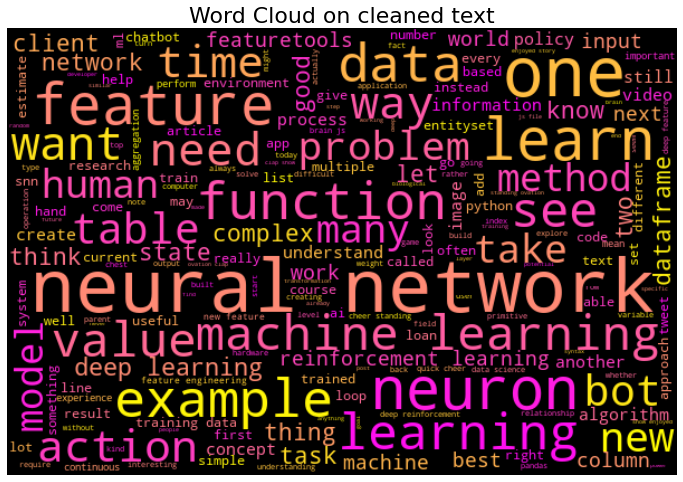

In [8]:
cloud=WordCloud(colormap="spring",width=600,height=400).generate(str(data["stopwords_rem"]))
fig=plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("Word Cloud on cleaned text", size = 22)

## Top 30 most frequent words in our text.

Text(0.5, 1.0, '30 most frequent words')

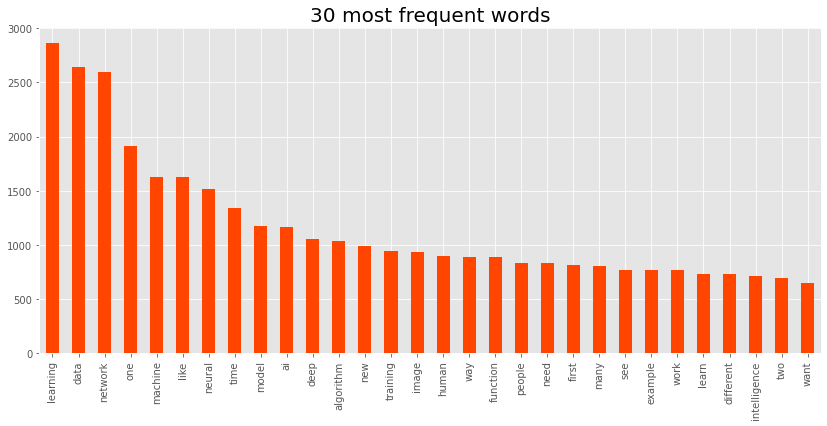

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(data["stopwords_rem"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "orangered")
plt.title("30 most frequent words",size=20)

## POS Tagging

In [9]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(str(data["stopwords_rem"]))

##Frequency of POS tagger

Text(0.5, 0, 'POS tagger')

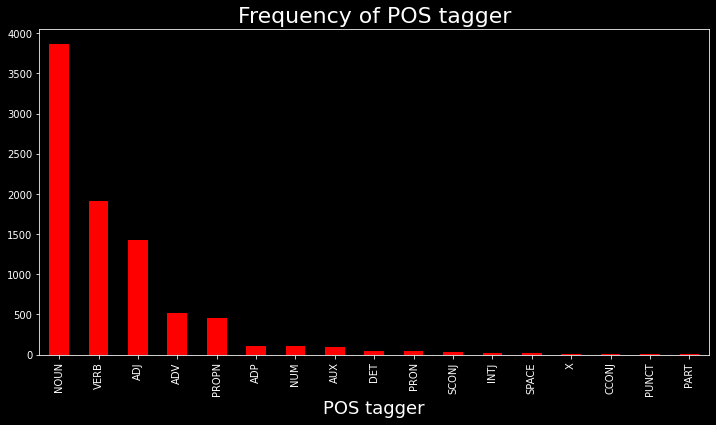

In [10]:
list = [token.pos_ for token in doc]
list = pd.Series(list)
plt.style.use("dark_background")
list.value_counts().plot(figsize = (12,6), kind = "bar", color = "r")
plt.title("Frequency of POS tagger", size = 22)
plt.xlabel("POS tagger", size = 18)

In [12]:
#Convert words into tokens
tokens = data["stopwords_rem"].apply(lambda x: nltk.word_tokenize(x))

## Bigrams Phrases

In [16]:
phrases = Phrases(tokens, min_count = 27, threshold = 41.5, delimiter=b'_')
bigram = Phraser(phrases)
bigram.phrasegrams


{(b'natural', b'language'): (176, 251.54573931907652),
 (b'years', b'ago'): (52, 132.19306466729145),
 (b'language', b'processing'): (145, 165.2871551376346),
 (b'machine', b'learning'): (1212, 45.85717666183113),
 (b'turing', b'test'): (36, 82.66666666666667),
 (b'state', b'art'): (57, 131.8481012658228),
 (b'quick', b'cheer'): (334, 431.03669025585197),
 (b'cheer', b'standing'): (334, 479.62175071821673),
 (b'standing', b'ovation'): (334, 479.62175071821673),
 (b'ovation', b'clap'): (334, 483.8166931443236),
 (b'clap', b'show'): (334, 332.49953808683966),
 (b'show', b'enjoyed'): (334, 309.9112542494185),
 (b'enjoyed', b'story'): (334, 323.21216644896435),
 (b'long', b'term'): (56, 88.37498523082115),
 (b'artificial', b'intelligence'): (335, 177.96979405034324),
 (b'feel', b'free'): (47, 68.32317880794702),
 (b'originally', b'published'): (39, 271.08708708708707),
 (b'sharing', b'concepts'): (41, 223.24818936583645),
 (b'concepts', b'ideas'): (41, 87.87428730357391),
 (b'ideas', b'cod

## Tri-gram

In [15]:
trigram = Phrases(bigram[tokens], min_count = 18, threshold = 26, delimiter=b'_')
trigram_final = Phraser(trigram)
trigram_final.phrasegrams

{(b'natural', b'language'): (176, 1864.0607677293426),
 (b'pretty', b'cool'): (23, 41.928644099149096),
 (b'years', b'ago'): (52, 509.6992394179894),
 (b'natural', b'language_processing'): (144, 431093.5471698113),
 (b'natural_language', b'processing'): (144, 472.0652479338843),
 (b'machine', b'learning'): (1212, 704.4945384262468),
 (b'high', b'quality'): (22, 31.159549789500815),
 (b'turing', b'test'): (36, 359.7876984126984),
 (b'state', b'art'): (57, 374.0406727667002),
 (b'low', b'level'): (38, 83.77205950291047),
 (b'every', b'day'): (36, 31.11499413732948),
 (b'quick_cheer', b'standing_ovation'): (334, 513.6543798630285),
 (b'clap', b'show'): (334, 41886.86257309942),
 (b'standing_ovation', b'clap_show'): (334, 513.6543798630285),
 (b'enjoyed', b'story'): (334, 12767.653297682711),
 (b'clap_show', b'enjoyed_story'): (334, 513.6543798630285),
 (b'long', b'term'): (56, 198.48068669527896),
 (b'data', b'science'): (233, 35.06427062375602),
 (b'artificial', b'intelligence'): (335, 1

## Glove for word embedding 

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
with ZipFile('glove.6B.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir()
    zip.extractall()

--2023-02-24 22:48:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-02-24 22:48:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-02-24 22:48:44--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
t = Tokenizer()
t.fit_on_texts(data["stopwords_rem"])
encoded_docs = t.texts_to_sequences(data["stopwords_rem"])

In [ ]:
embeddings_dict = {}
with open("glove.6B.100d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [ ]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

### Calculate cosine_similarity

In [ ]:
def cosine_similarity1(A, B):
 
    dot = np.dot(A,B)
    norma = np.sqrt(np.dot(A,A))
    normb = np.sqrt(np.dot(B,B))
    cos = dot / (norma*normb)
    return cos

In [ ]:
cosine_similarity(embeddings_dict["machine"],embeddings_dict["learning"])


0.33105597

## Word Embedding using fasttext

In [ ]:
tokens_3 = [word for word in trigram_final[tokens]] 


In [ ]:
fastext_mdl = FastText(tokens_3,
                      window = 5,
                      size = 100,
                      alpha = 0.01,
                      min_alpha = 0.0005,
                      workers = multiprocessing.cpu_count(),
                      seed = 42)

### Calculate similarity

In [ ]:
print(fastext_mdl.wv.similarity(w1='machine', w2='learning'))

0.9933743


##TSNE plot for the word-embeddings

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity = 30, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 13)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
    plt.show()


<ipython-input-35-5294e5a591af>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


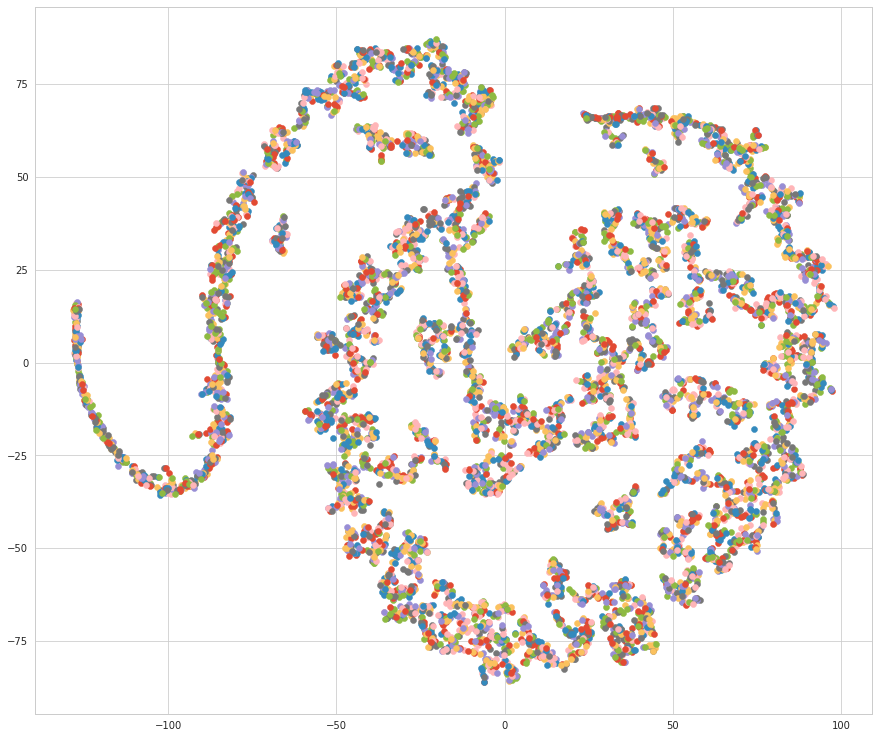

In [ ]:
sns.set_style('whitegrid')
tsne_plot(fastext_mdl)

##Applying Semantic Search

In [ ]:
def semantic_search(query, documents, n_results=5):
    
    query_vector =fastext_mdl.wv[query]
    document_vectors = [fastext_mdl.wv[texts] for texts in documents]
    similarity_scores = cosine_similarity([query_vector], document_vectors)[0]
    top_indices = similarity_scores.argsort()[::-1][:n_results]
    return top_indices

In [ ]:
query="i love machine learning and natural language"
texts = list(data["stopwords_rem"])

In [ ]:
# Perform semantic search
top_indices = semantic_search(query, texts, n_results=5)

for i, index in enumerate(top_indices):
    print(f"Rank {i+1}:")
    print(f"Text: {texts[index]}")
  


Rank 1:
Text: trending month artificial intelligence topics include whether experienced artificial intelligence newbie looking learn basics ai something everyone list disclosure receive compensation courses feature stars hours video students build ai combines power data science machine learning deep learning create powerful ai real world applications chance understand story behind artificial intelligence learn stars hours video students completely understand relationship reinforcement learning psychology technical level apply gradient based supervised machine learning methods reinforcement learning implement different reinforcement learning algorithm learn lance ulanoff heard google duplex yet pretty talk internet google ceo sundar pichai dropped biggest bomb introduced google duplex take look story know irhum shafkat understanding convolutions often feel bit unnerving yet concept fascinatingly powerful highly extensible let try break mechanics convolution operation step step relate ex